#### ANALYSIS OF BREAST CANCER DIAGNOSTIC

#### Jomesh Babu:


### OVERVIEW:
Breast cancer is one of the most common and serious health concerns worldwide, affecting millions of women each year. Early prediction and diagnosis of breast cancer can be challenging due to the complexity of the disease and its varying forms. The Breast Cancer dataset, commonly used in machine learning applications, provides a valuable resource for developing predictive models. It contains data on various features derived from fine-needle aspirates of breast mass images, such as tumor size, shape, and texture. By leveraging this data, machine learning models can aid in the classification of tumors as benign or malignant, enabling early intervention and personalized treatment plans. The development of such models is vital for enhancing diagnostic accuracy, optimizing healthcare resources, and improving patient outcomes in the fight against breast cancer.

### OBJECTIVES:
To develop the best breast cancer diagnostic accuracy prediction model using machine learning techniques.

## Source: 
The dataset comes from the UCI Machine Learning Repository and includes diagnostic data for breast cancer cases.
## Features:
30 numerical features derived from a digitized image of a fine-needle aspirate of a breast mass. 
Example of feature names: "mean radius", "mean texture", "worst perimeter".

Import libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score, f1_score,confusion_matrix,roc_curve
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import joblib

#### DATA COLLECTION

In [3]:
#data collection
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names) #assigned data into x and y axis
y = pd.Series(data.target)

In [6]:
print("Dataset Shape:",X)   #overall informations of the data
print("Target Distribution:")
print(y.value_counts(normalize=True))

Dataset Shape:      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean conc

### DATA CLEANING AND FILTERING

In [4]:
print("Basic Statistics:")
print(X.describe())

Basic Statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.0

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [14]:
X.duplicated().sum()

0

### EDA PROCESSING


In [5]:
numerical_column=X.select_dtypes(include=['number']).columns.tolist()
print("numerical columns:",numerical_column)

numerical columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [6]:
categorical_columns=X.select_dtypes(include=['object','category']).columns.tolist()
print("categorical_columns",categorical_columns)

categorical_columns []


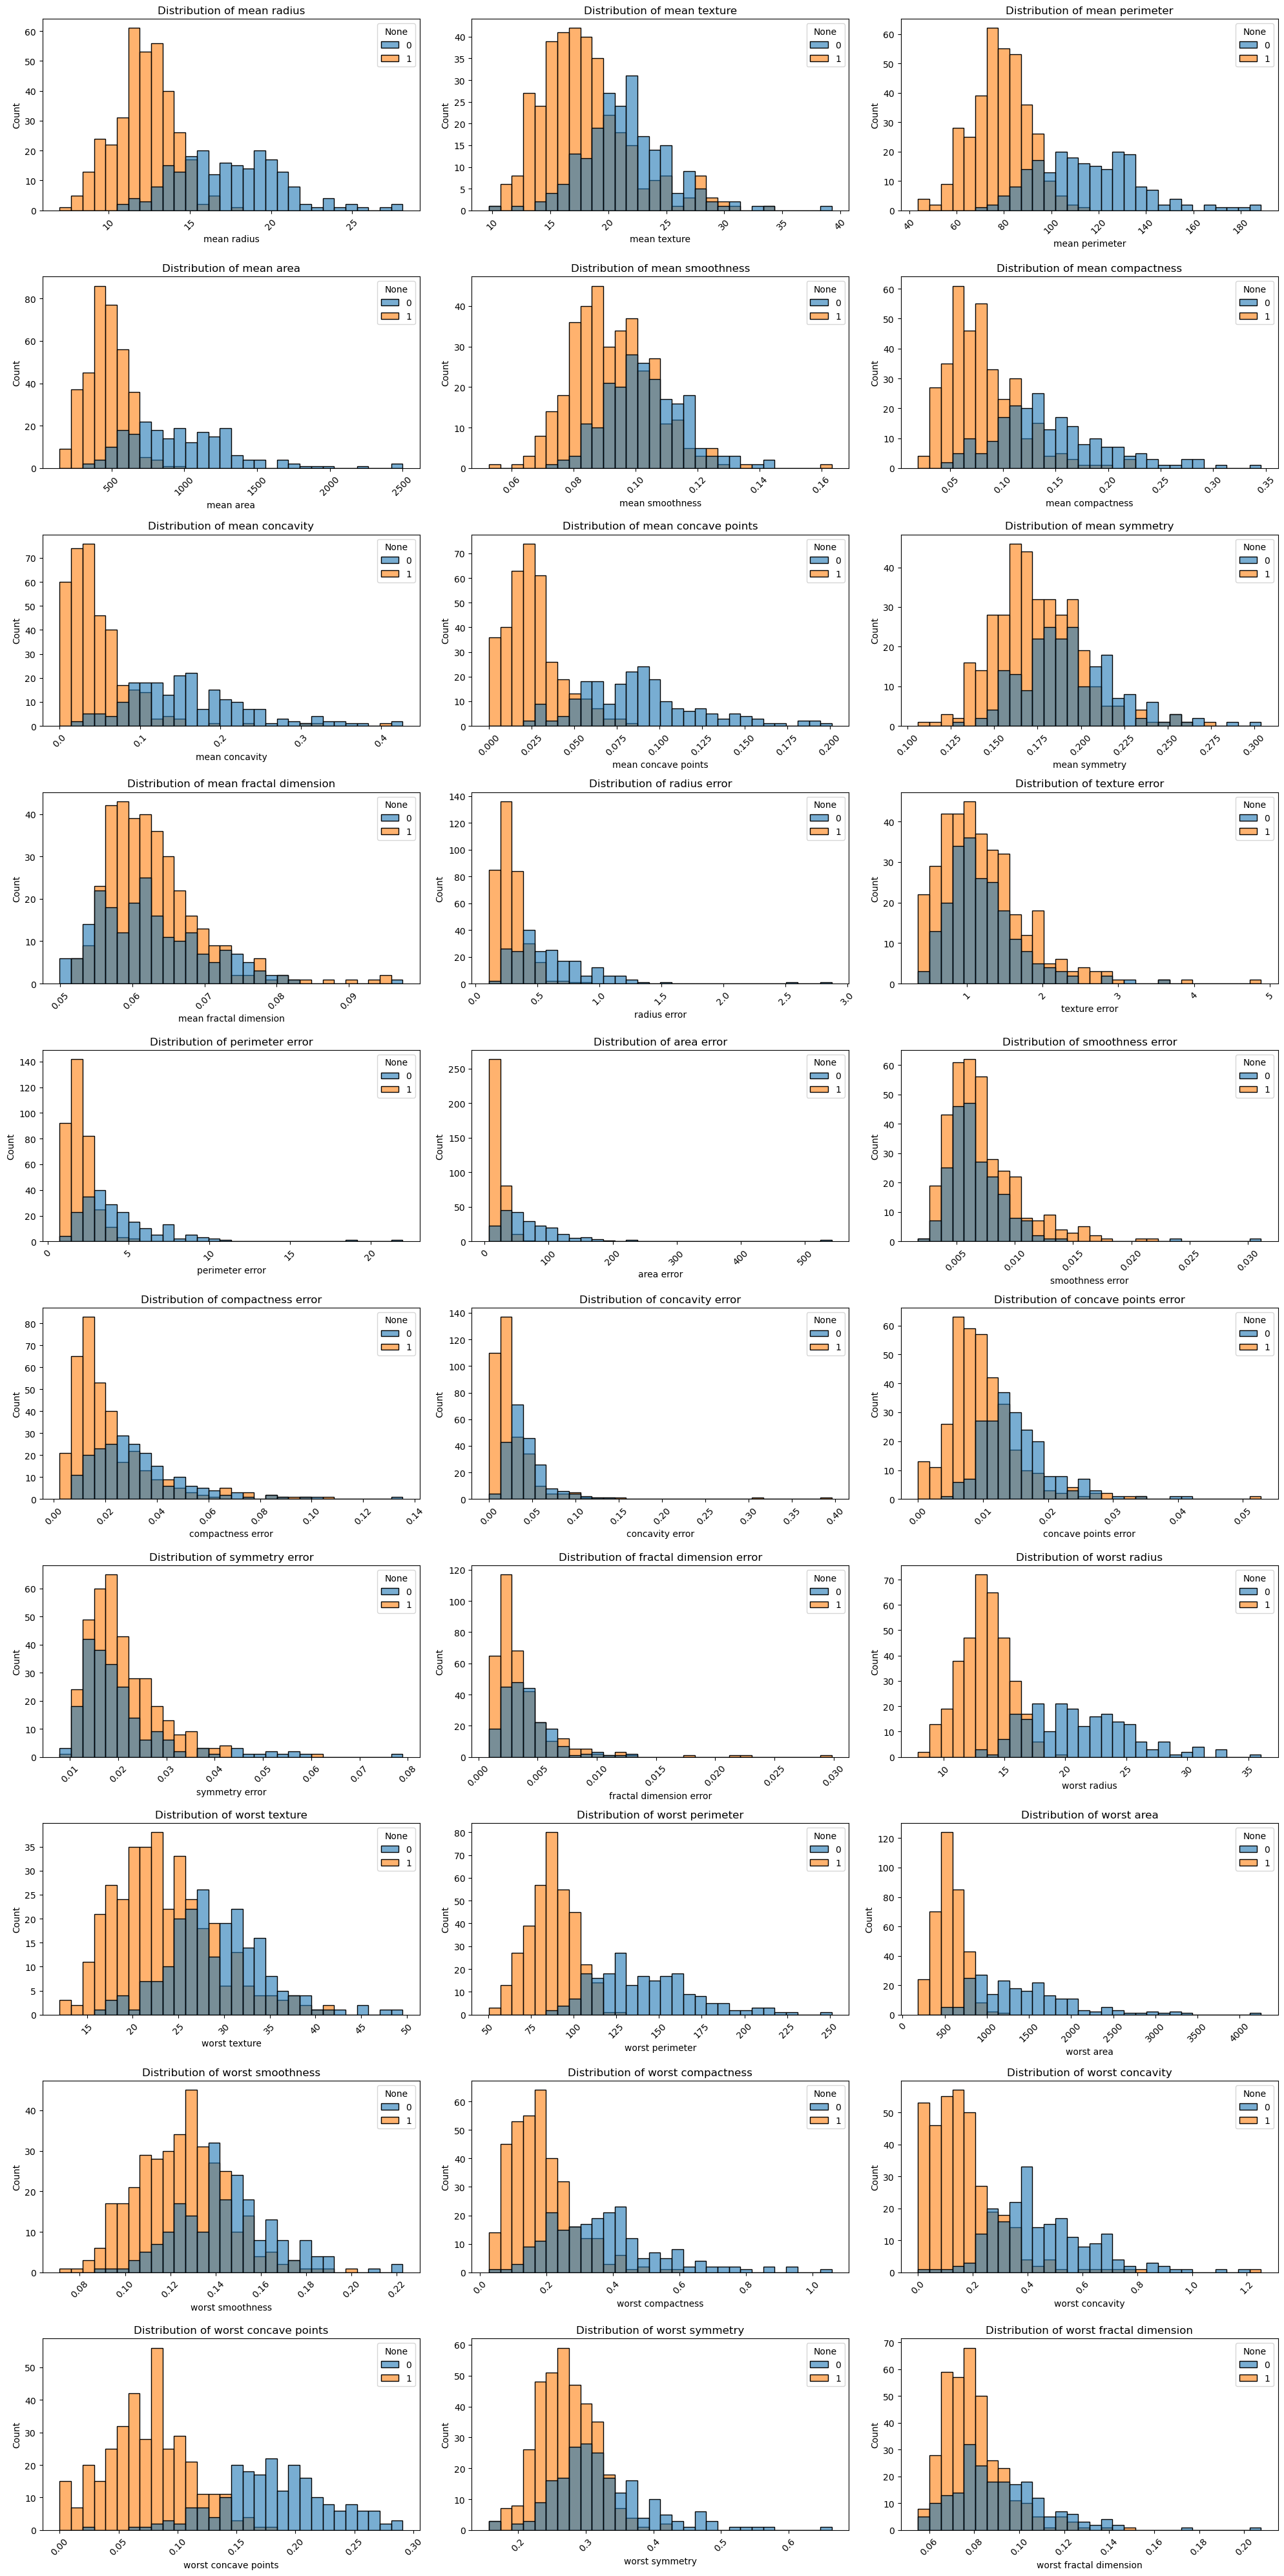

In [20]:
plt.figure(figsize=(20, 40))
for i, column in enumerate(X.columns, 1):
    plt.subplot(10, 3, i)
    sns.histplot(data=X, x=column, hue=y, bins=30, alpha=0.6)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

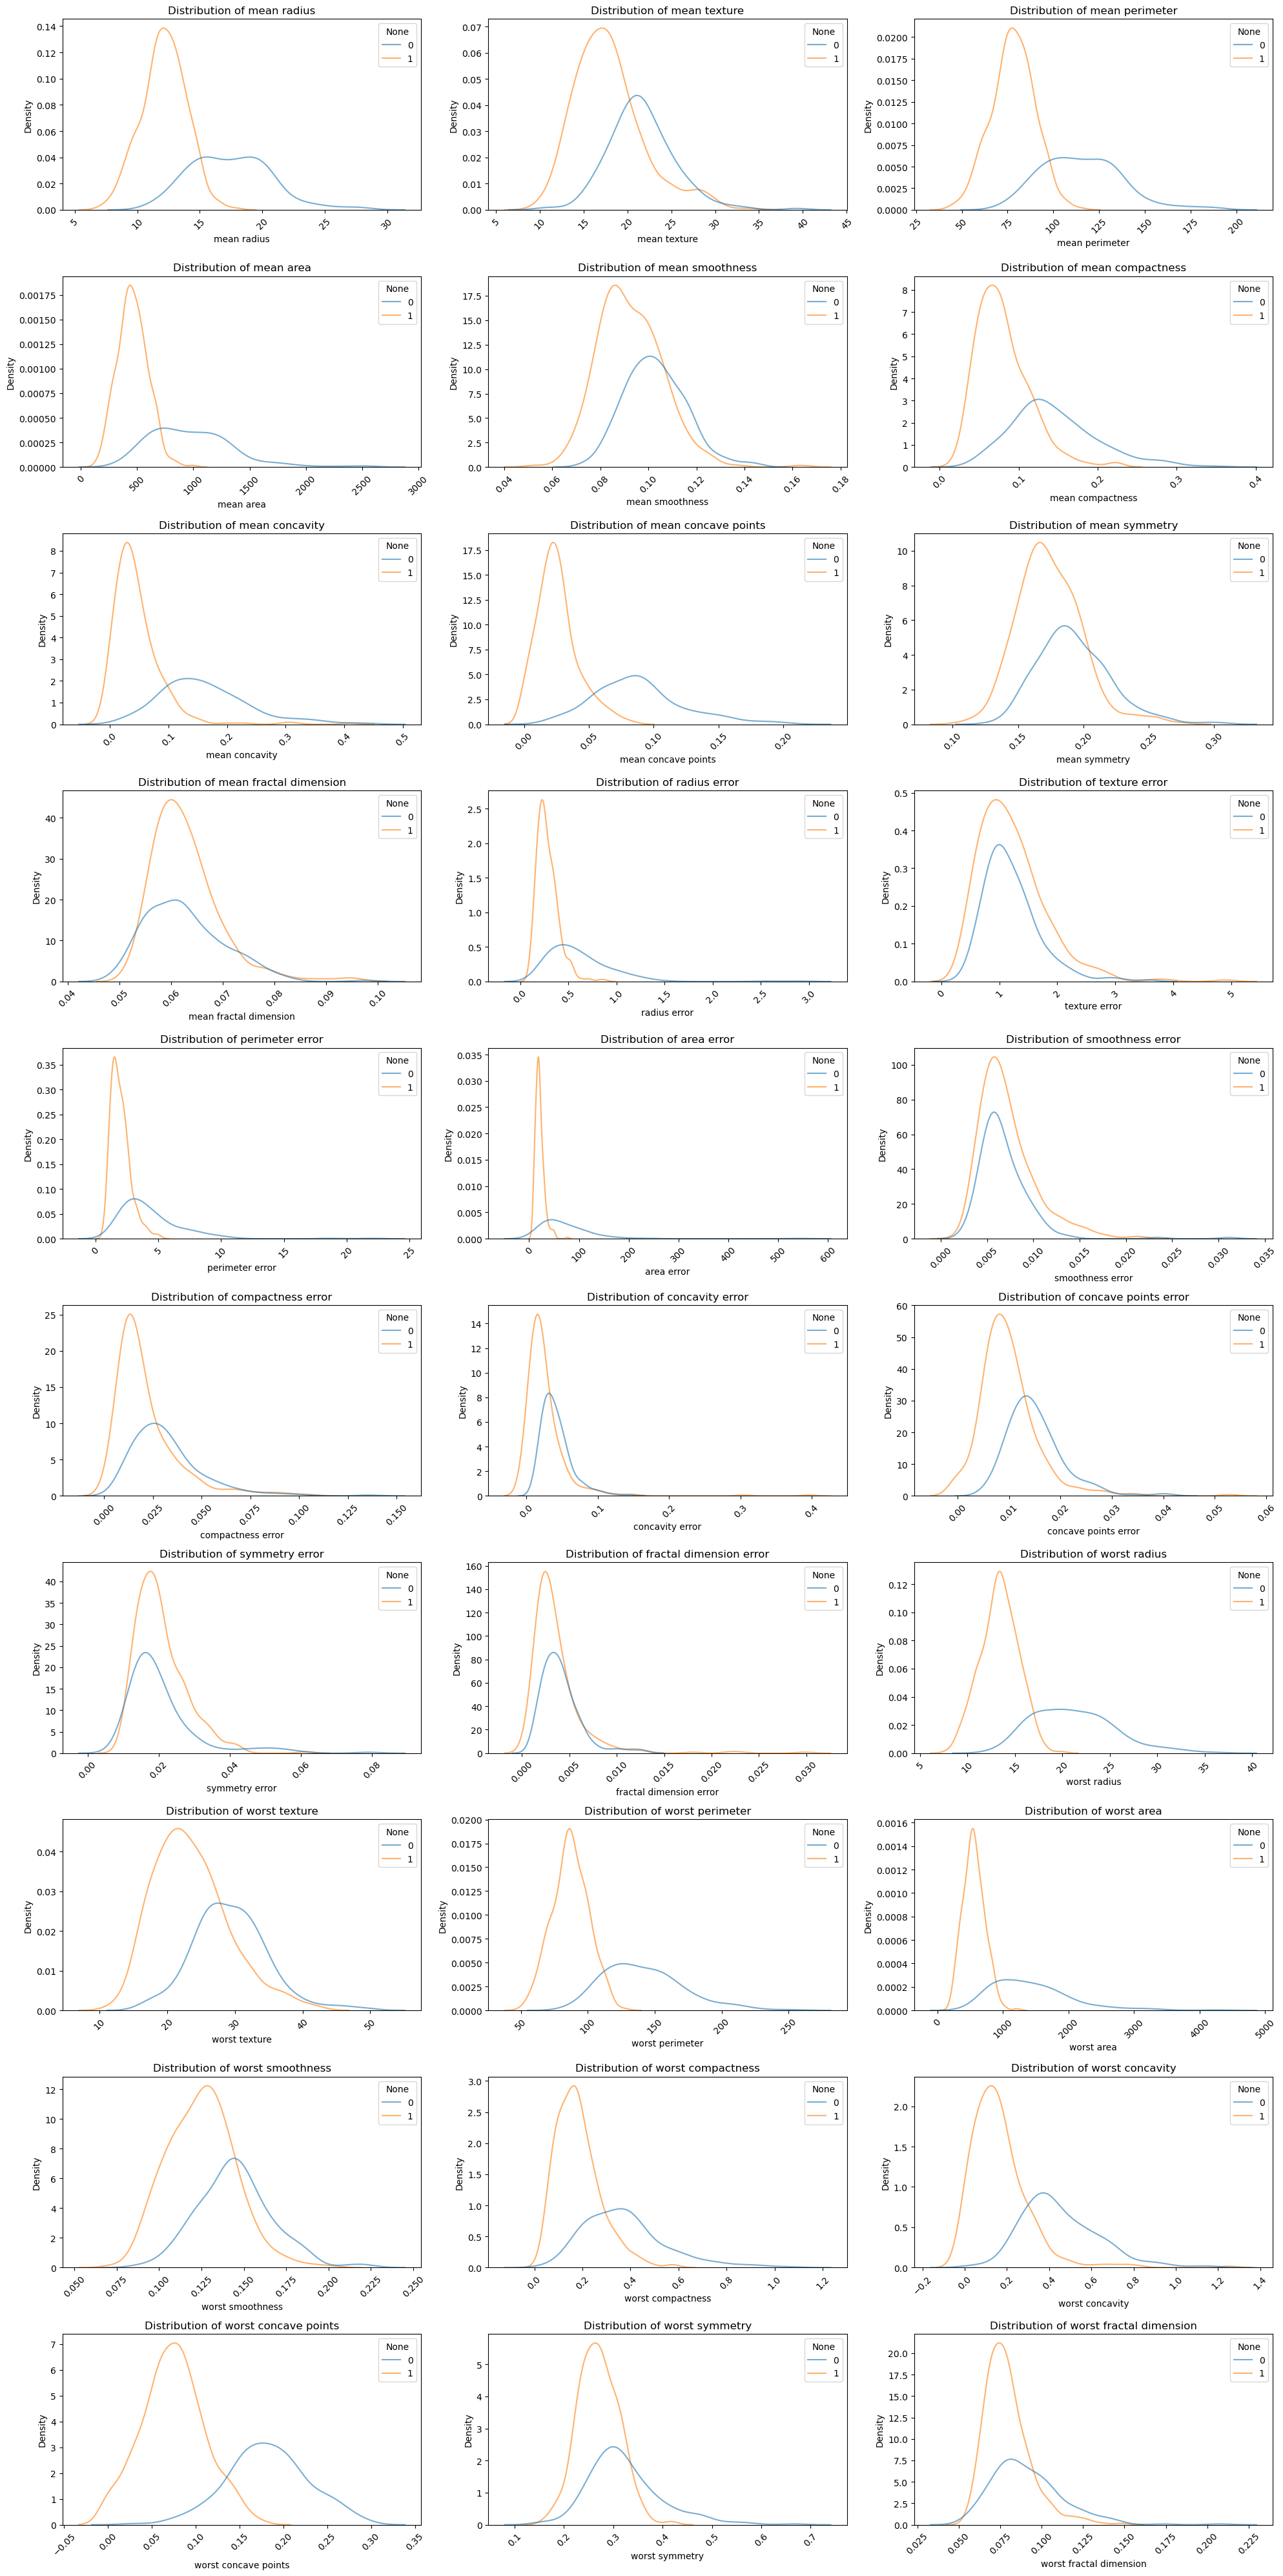

In [143]:
plt.figure(figsize=(20, 40))
for i, column in enumerate(X.columns, 1):
    plt.subplot(10, 3, i)
    sns.kdeplot(data=X, x=column, hue=y, alpha=0.6)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

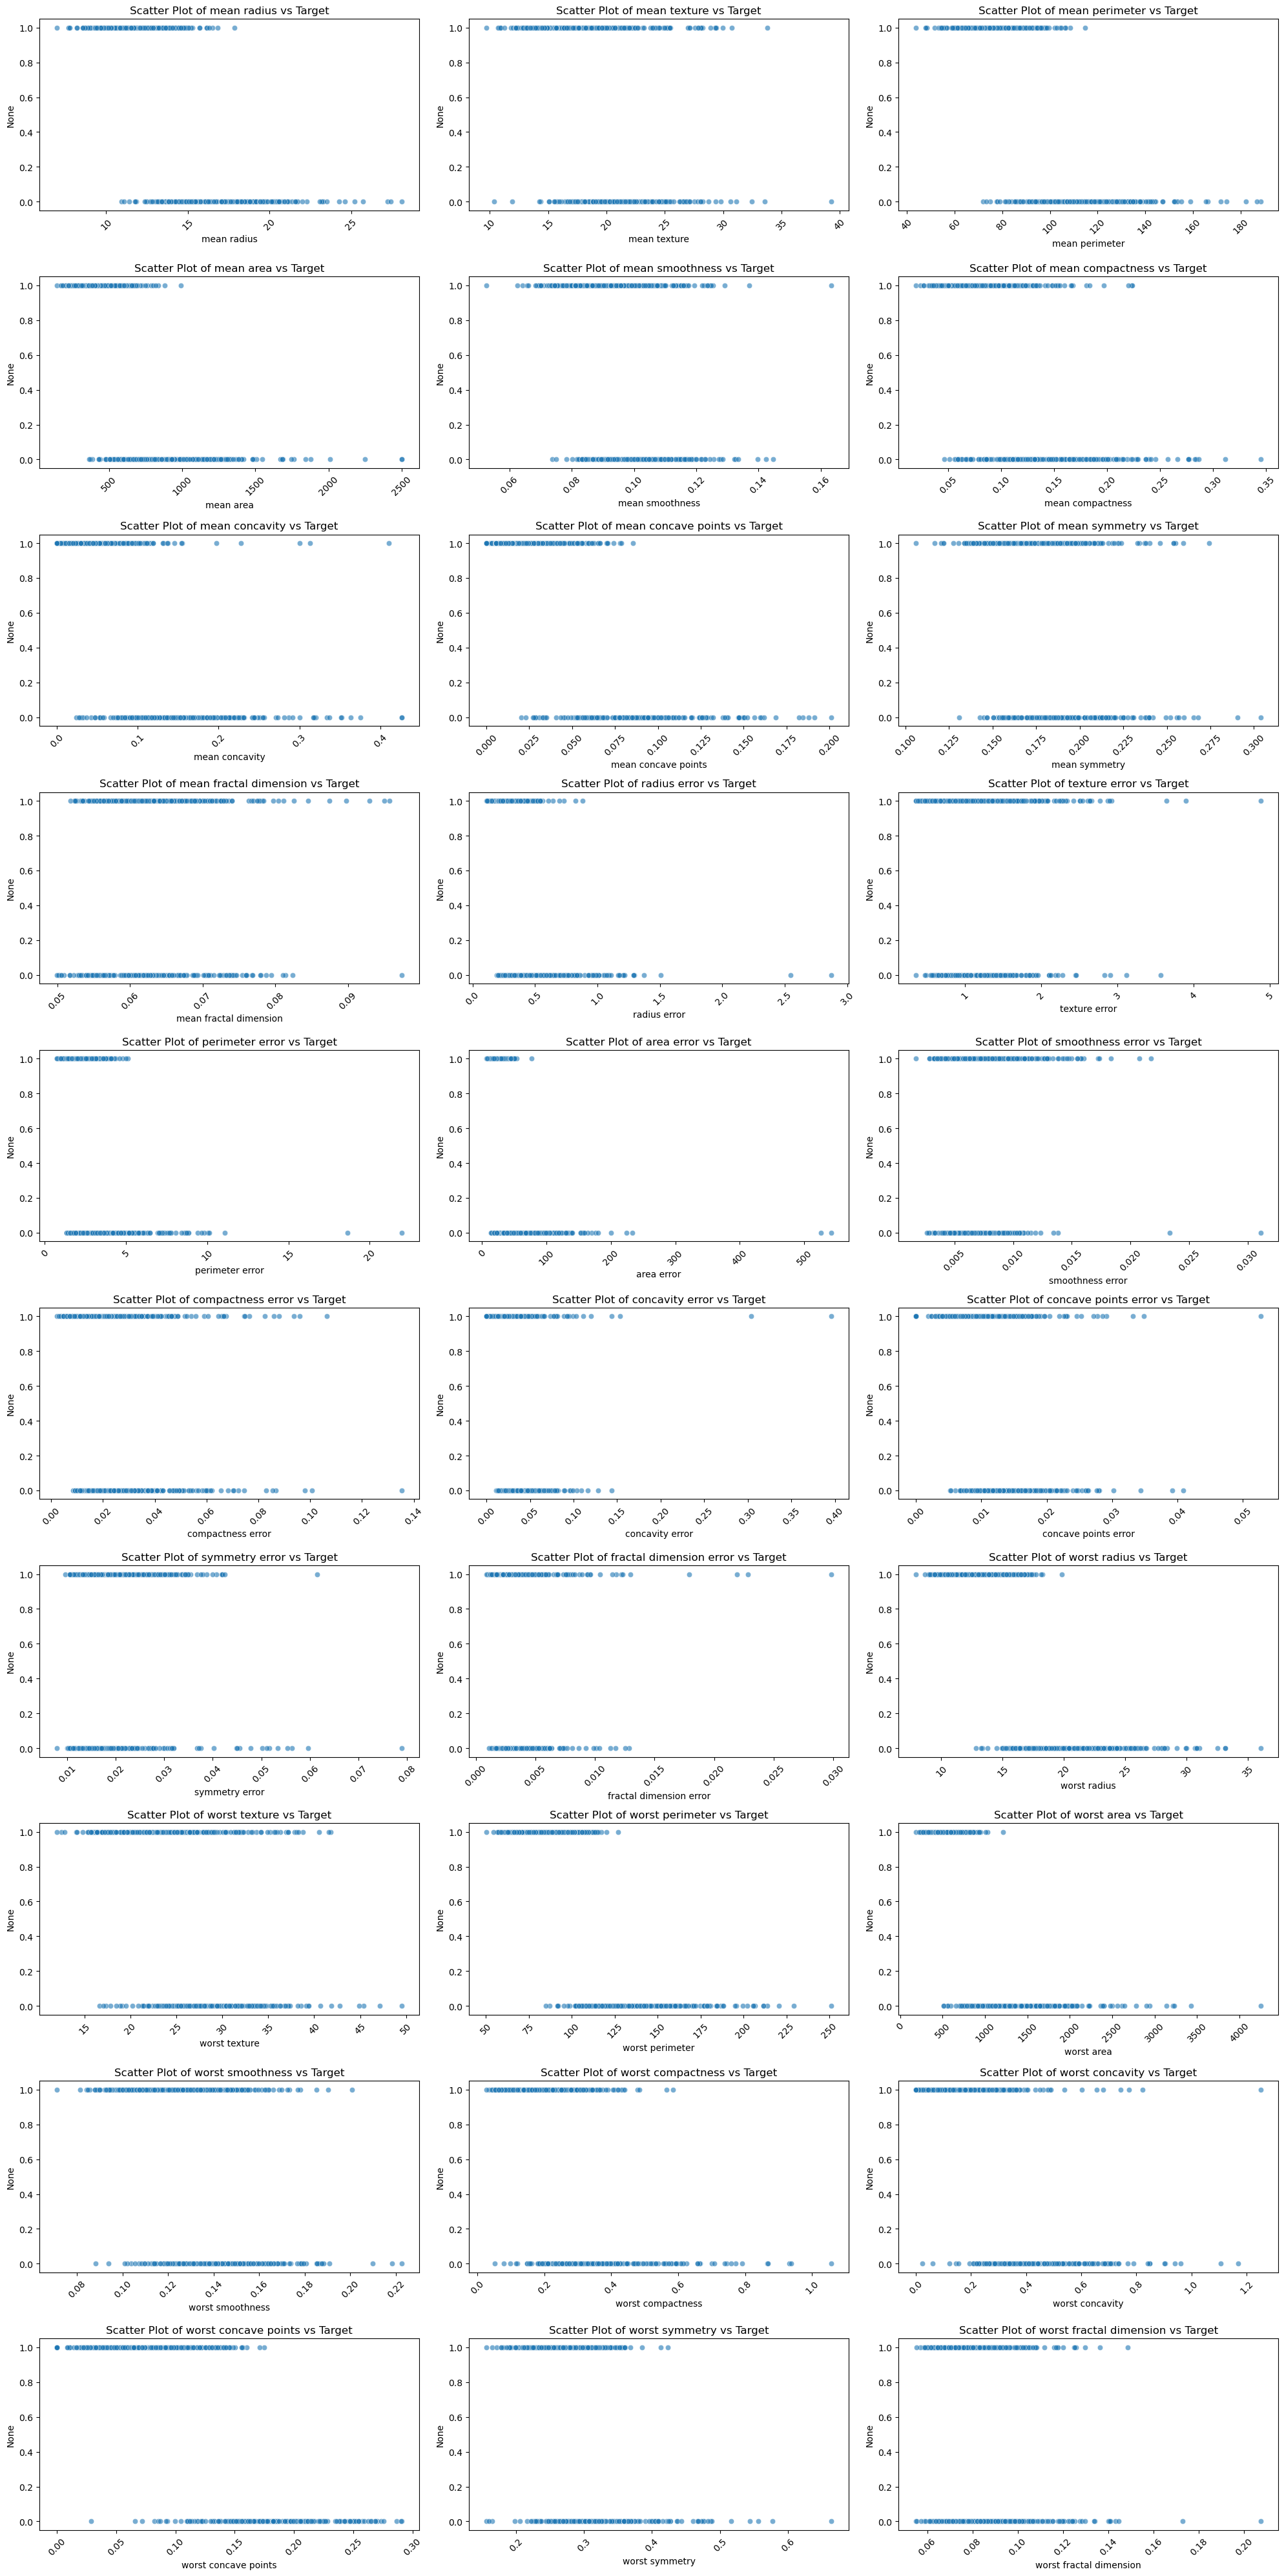

In [139]:
plt.figure(figsize=(20, 40))
for i, column in enumerate(X.columns, 1):
    plt.subplot(10, 3, i)
    sns.scatterplot(data=X, x=column, y=y, alpha=0.6)
    plt.title(f'Scatter Plot of {column} vs Target')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

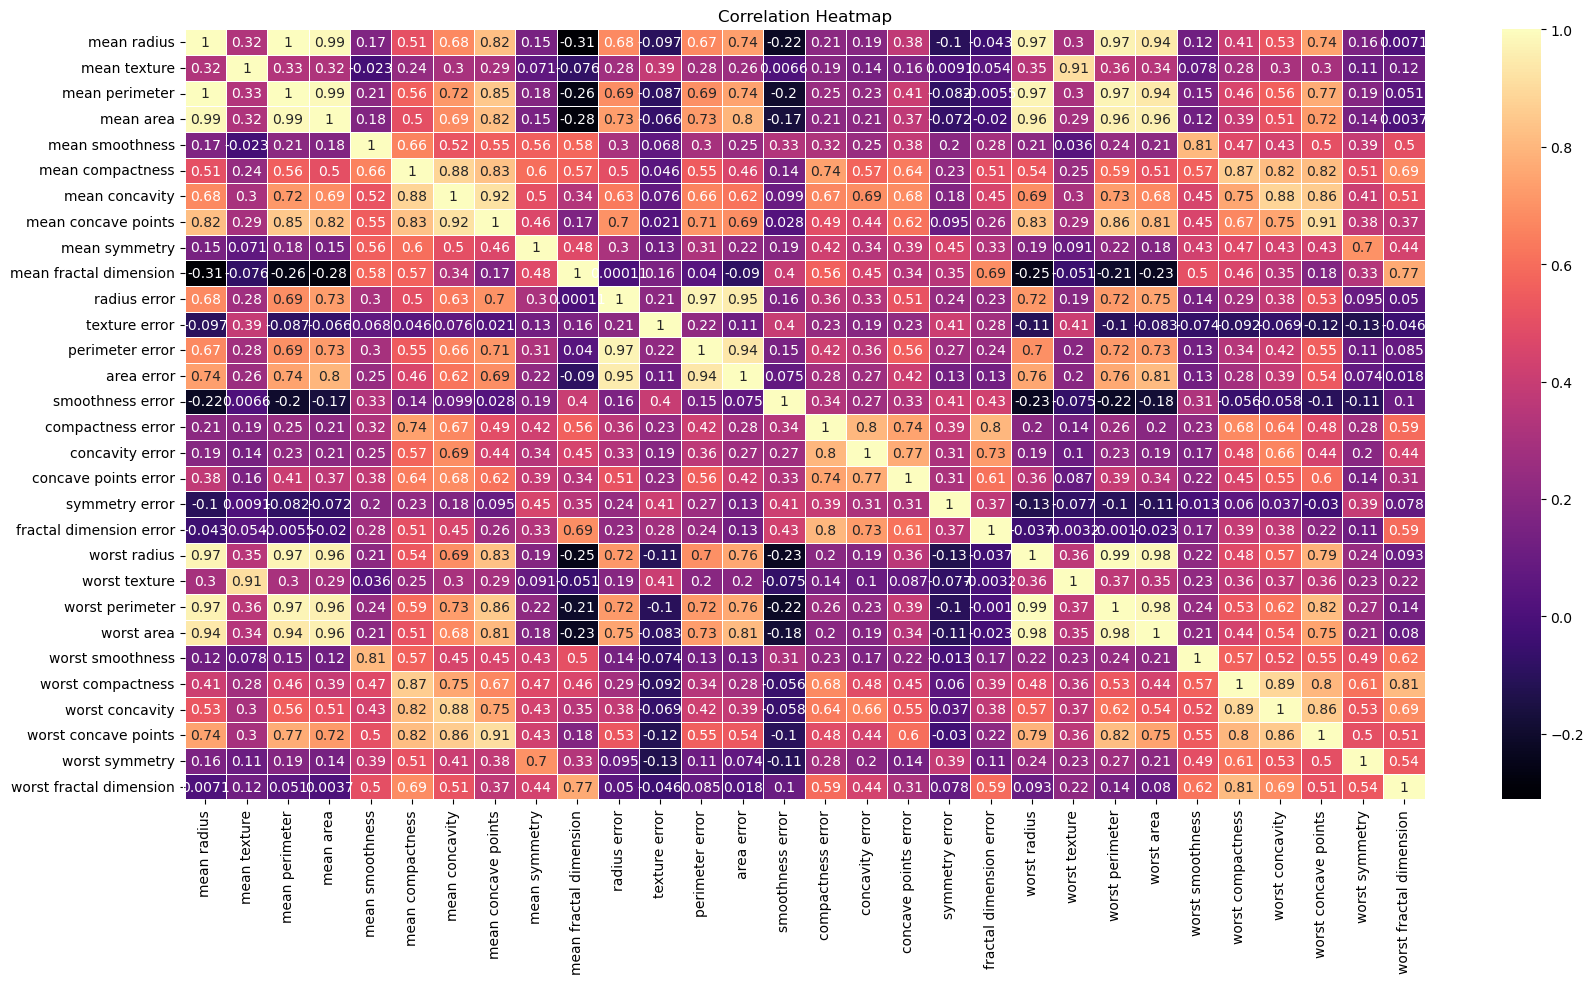

In [21]:
correlation_matrix = X[numerical_column].corr()
plt.figure(figsize=(20, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### FEATURE SELECTION

In [7]:
var_threshold = VarianceThreshold(threshold=0.5)
x_var = var_threshold.fit_transform(X)
var_selected = X.columns[var_threshold.get_support()].tolist()

print("1. Filter Methods Results:")
print("\na) Variance Threshold")
print(f"Features selected: {len(var_selected)}")
print("Selected features:", var_selected[:6], "...")

1. Filter Methods Results:

a) Variance Threshold
Features selected: 10
Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error'] ...


### SCALING

In [14]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [16]:
X_standardized = standard_scaler.fit_transform(X)
X_normalized = minmax_scaler.fit_transform(X)

In [18]:
# Convert to DataFrames for better visualization
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

In [20]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

In [22]:
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

### MODEL CREATION

### TRAINING MODELS

## Classification models algorithms:

1.Decision Trees: Tree-like structure for decision making.
2.Random Forest: Ensemble of decision trees for robust classification.
3.Support Vector Machines (SVM): Separates classes using a hyperplane.
4.K-Nearest Neighbors (KNN): Classifies based on proximity to nearest data points.
5.Gradient Boosting Classifier: It is a powerful machine learning algorithm used for classification tasks. It builds an ensemble of weak learners sequentially, with each new tree trying to correct the errors of the previous ones.
6.Gaussian Naive Bayes (Gaussian NB): it is a classification algorithm based on the Naive Bayes theorem. It is particularly effective for datasets where the input features are continuous.


In [24]:
print("\nTraining models...")
models = {
    ' DecisionTreeClassifier': DecisionTreeClassifier(random_state=42,max_depth=5),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100,
                               max_depth=10,
                               random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100,
                                    learning_rate=0.1,
                                    max_depth=3,
                                    random_state=42),
    
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'GaussianNB': GaussianNB(),

}


Training models...


## Classification Model Performance Metrics:

1.Accuracy: Percentage of correct predictions.
2.Precision and Recall: Metrics for imbalanced datasets.
3.F1 Score: Harmonic mean of precision and recall.



In [76]:
result={}
for name,model in models.items():
    print(f"Training names:{name}...")
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    #model Evaluation
    result[name]={
        
        'accuracy_score': accuracy_score(y_test,y_pred),
        'precision_score': precision_score(y_test,y_pred, average='macro'),
        'recall_score': recall_score(y_test,y_pred, average='macro'),
        'f1_score': f1_score(y_test,y_pred, average='macro'),
        
    }
        

Training names: DecisionTreeClassifier...
Training names:RandomForestClassifier...
Training names:GradientBoostingClassifier...
Training names:SVC...
Training names:KNeighborsClassifier...
Training names:GaussianNB...


### VIEW MODEL PERFORMANCE

In [78]:
print("\nModel Performance:")
for model_name, metrics in result.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
         print(f"{metric_name}: {value:}")



Model Performance:

 DecisionTreeClassifier:
accuracy_score: 0.9473684210526315
precision_score: 0.9439895185063871
recall_score: 0.9439895185063871
f1_score: 0.9439895185063871

RandomForestClassifier:
accuracy_score: 0.9649122807017544
precision_score: 0.9672569328433009
recall_score: 0.9580740255486406
f1_score: 0.9623015873015872

GradientBoostingClassifier:
accuracy_score: 0.956140350877193
precision_score: 0.9553571428571428
recall_score: 0.9510317720275139
f1_score: 0.9531057178116001

SVC:
accuracy_score: 0.9824561403508771
precision_score: 0.9863013698630136
recall_score: 0.9767441860465116
f1_score: 0.9811507936507937

KNeighborsClassifier:
accuracy_score: 0.9473684210526315
precision_score: 0.9439895185063871
recall_score: 0.9439895185063871
f1_score: 0.9439895185063871

GaussianNB:
accuracy_score: 0.9649122807017544
precision_score: 0.9672569328433009
recall_score: 0.9580740255486406
f1_score: 0.9623015873015872


### FIND BEST MODEL

In [74]:
best_model_name = max(result.items(), key=lambda x: x[1]['accuracy_score'])[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: SVC


 ### CONFUSION MATRIX VISUALIZATION IN ALL MODELS

Training names: DecisionTreeClassifier...


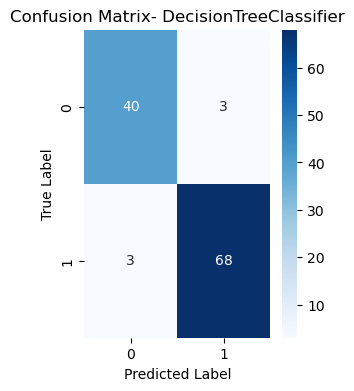

Training names:RandomForestClassifier...


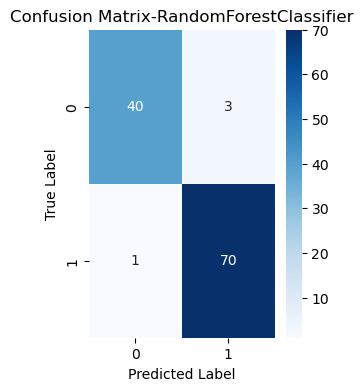

Training names:GradientBoostingClassifier...


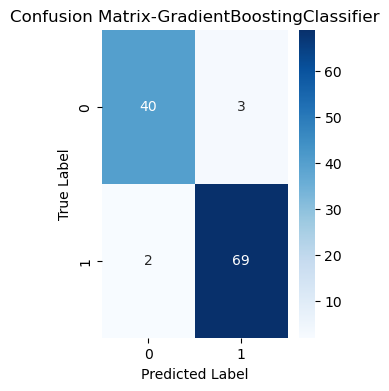

Training names:SVC...


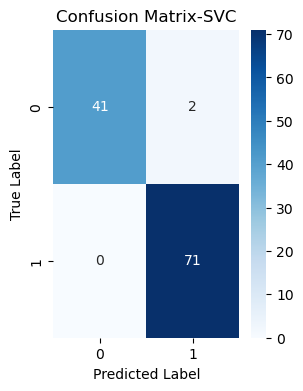

Training names:KNeighborsClassifier...


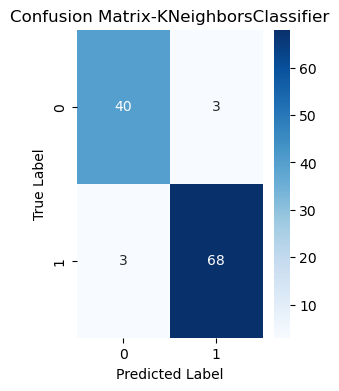

Training names:GaussianNB...


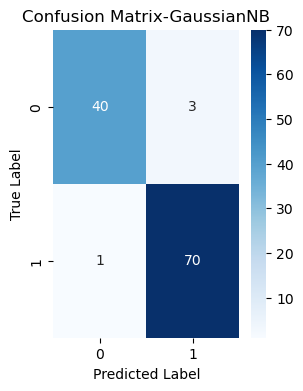

In [116]:
result={}
for name,model in models.items():
    print(f"Training names:{name}...")
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    #model Evaluation
    cm = confusion_matrix(y_test, y_pred)
    result[name]={
        
        'confusion_matrix': cm
    }
    plt.figure(figsize=(3,4))
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
    plt.title(f'Confusion Matrix-{name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()   
    
                  
                           
   

### HYPERPARAMETER TUNING FOR BEST MODEL CREATION

In [90]:
# 13. Hyperparameter Tuning
print("\nTuning best model...")
if isinstance(best_model, SVC):
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'],
    }
elif isinstance(best_model,RandomForestClassifier):
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
elif isinstance(best_model,GaussianNB):
    param_grid = {
        'hidden_layer_sizes': [(100,), (100, 50)],
        'alpha': [0.0001, 0.001],
        'learning_rate_init': [0.001, 0.01]
    }
else:
    param_grid = {}


Tuning best model...


In [92]:
if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


### SAVE THE MODEL

In [123]:
# save the model

print("\n Saving Model:")
joblib.dump(best_model,'breast_cancer_model.joblib')
print("Model and Scaled saved as 'breast_cancer_model.joblib' and 'breast_cancer_scaler.joblib'")


 Saving Model:
Model and Scaled saved as 'breast_cancer_model.joblib' and 'breast_cancer_scaler.joblib'


### UNSEEN DATA TESTING

In [125]:
# 15. Test with Unseen Data
print("\nTesting with unseen data...")
final_predictions = best_model.predict(X_test_scaled)
final_metrics = {
    'accuracy_score': accuracy_score(y_test,final_predictions),
    'precision_score': precision_score(y_test,final_predictions, average='macro'),
    'recall_score': recall_score(y_test,final_predictions, average='macro'),
    'f1_score': f1_score(y_test,final_predictions, average='macro'),
        
}


Testing with unseen data...


#### FINALIZED MODEL PERFORMANCE REPORT

In [127]:
print("\nFinal Model Performance:")
for metric_name, value in final_metrics.items():
    print(f"{metric_name}: {value:.4f}")


Final Model Performance:
accuracy_score: 0.9825
precision_score: 0.9863
recall_score: 0.9767
f1_score: 0.9812


### FINAL MODEL VISUALIZATION

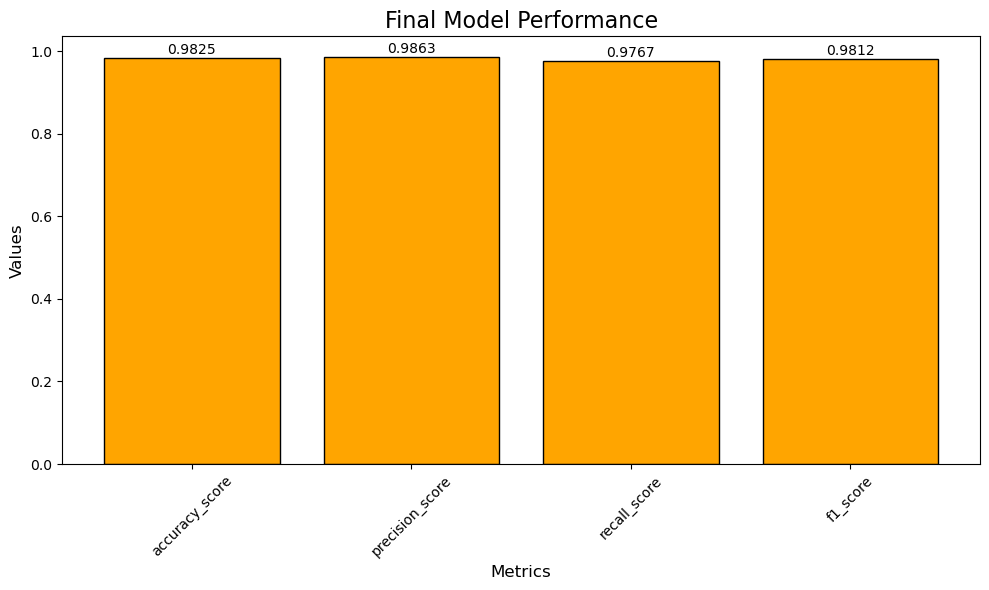

In [133]:
metric_names = list(final_metrics.keys())
metric_values = list(final_metrics.values())

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color='orange', edgecolor='black')

# Adding labels and title
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Final Model Performance', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Display the values on top of each bar
for i, value in enumerate(metric_values):
    plt.text(i, value + 0.01, f"{value:.4f}", ha='center', fontsize=10)

plt.show()


### CONCLUSION
The breast cancer dataset provides valuable insights into the characteristics and diagnosis of breast cancer, allowing for the development of predictive models that can assist in early detection and diagnosis. Here we can get more predicted results in SVC model prediction. its gives the maximum accuracy rate, and we can visually understand the analyzed model performance in the bar chart.
The use of advanced data analysis techniques and predictive modeling in breast cancer research continues to enhance our understanding and approach to diagnosis, fostering the potential for more personalized treatment strategies and better overall healthcare management.